<a href="https://colab.research.google.com/github/michalhal92/coffee-store-sales/blob/main/3.%20Pog%C5%82%C4%99biona%20analiza%20Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Biblioteki

In [5]:
# wczytanie bibliotek
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Segmentacja klientów

In [6]:
# Wczytanie danych
clv = pd.read_csv('/content/sample_data/wartosc i lojalnosc klienta rfm avg csv.csv')
df_clv = pd.DataFrame(clv)
df_clv.head()

,card,customer_type,R_recency_days_since_last_purchase,F_total_orders,M_lifetime_value,avg_products_per_order_per_customer,avg_order_value_per_customer
0,ANON-0000-0000-0012,CARD,62,88,6380.08,1.682171,49.457984
1,ANON-0000-0000-0141,CARD,50,90,3728.42,1.351852,34.522407
2,ANON-0000-0000-1163,CARD,2,56,3638.98,1.597403,47.259481
3,ANON-0000-0000-0276,CARD,52,59,2837.66,1.318841,41.125507
4,ANON-0000-0000-0507,CARD,2,38,2792.70,1.549020,54.758824


In [9]:
df_clv.shape

(342, 7)

In [11]:
df_clv.isnull().sum()

,0
card,0
customer_type,0
R_recency_days_since_last_purchase,0
F_total_orders,0
M_lifetime_value,0
avg_products_per_order_per_customer,0
avg_order_value_per_customer,0


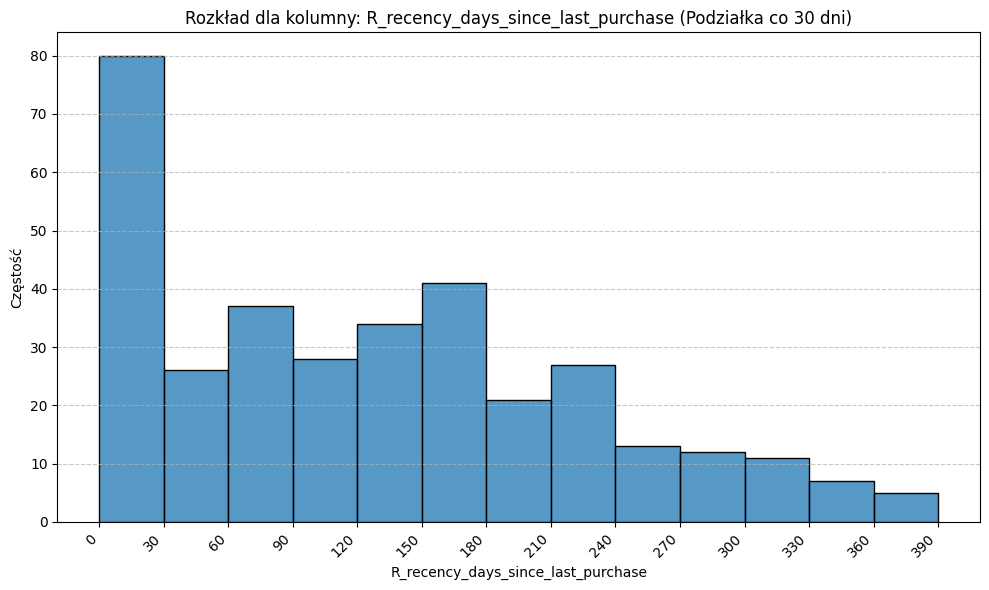

In [22]:
# wykres R

# Ustalenie maksymalnej liczby dni od ostatniego zakupu
max_R = df_clv['R_recency_days_since_last_purchase'].max()

# Definicja binów co 30 dni
# Numpy arange tworzy sekwencję [0, 30, 60, 90, ..., max_days]
bins_30_R = np.arange(0, max_R + 30, 30)

# Stworzenie histogramu
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df_clv,
    x='R_recency_days_since_last_purchase',
    bins=bins_30_R,
    kde=False, # Wyłączamy estymację gęstości, aby wykres był czystszy
    edgecolor='black'
)

# Ustawienie etykiet na osi X
plt.xticks(
    ticks=bins_30_R,
    rotation=45,
    ha='right'
)

plt.title('Rozkład dla kolumny: R_recency_days_since_last_purchase (Podziałka co 30 dni)')
plt.xlabel('R_recency_days_since_last_purchase')
plt.ylabel('Częstość')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [20]:
# Definicja progów (bin edges) i etykiet (score)
# Używamy max() + 1, aby złapać największą wartość Recency
bins_R = [0, 30, 90, 180, df_clv['R_recency_days_since_last_purchase'].max() + 1]

# Etykiety: 4 (najlepiej) do 1 (najgorzej)
labels_R = [4, 3, 2, 1]

df_clv['R_Score_Manual'] = pd.cut(
    df_clv['R_recency_days_since_last_purchase'],
    bins=bins_R,
    labels=labels_R,
    include_lowest=True, # Upewnia się, że wartość 0 dni jest wliczona
    right=False         # Ustawia interwały jako [0, 30), [30, 90), itd.
).astype(int)

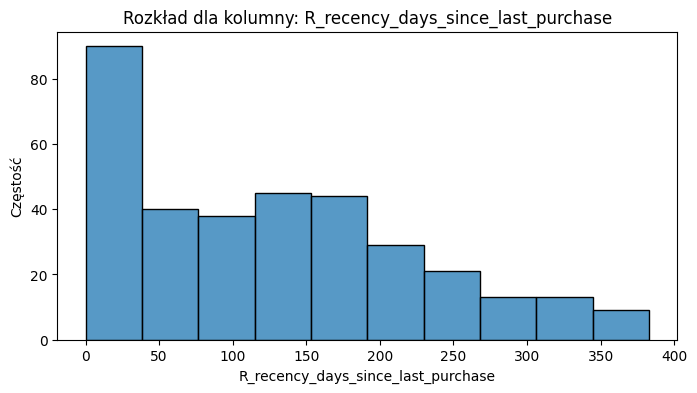

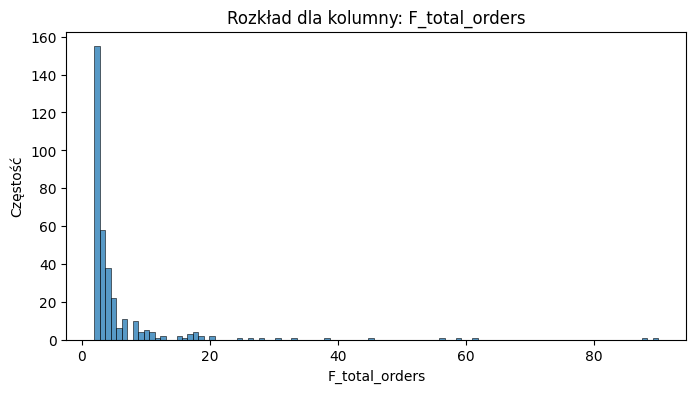

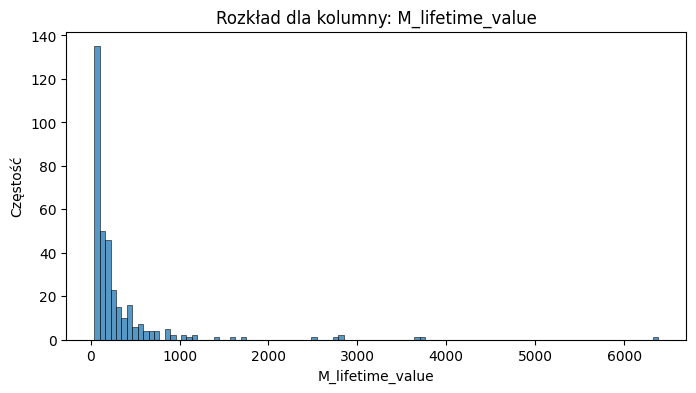

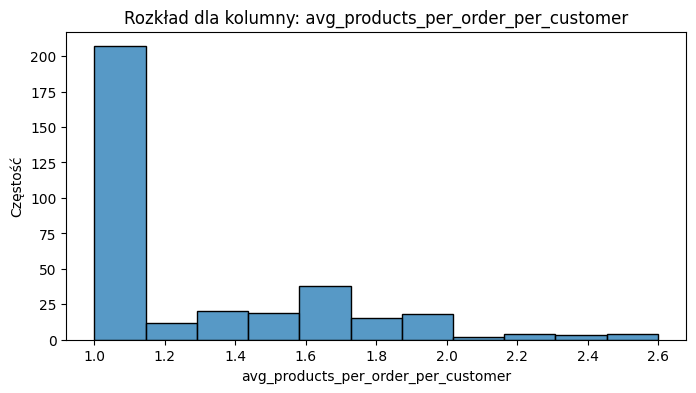

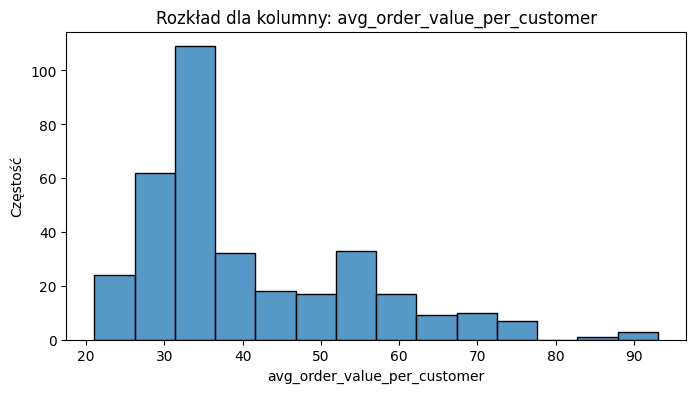

In [12]:
# rozkład dancyh

# Select only numerical columns for plotting
numerical_cols = df_clv.select_dtypes(include=['float64', 'int64']).columns

# Plot histograms for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_clv[col], kde=False)
    plt.title(f'Rozkład dla kolumny: {col}')
    plt.xlabel(col)
    plt.ylabel('Częstość')
    plt.show()

In [16]:
# df_clv to DataFrame z wynikami CLV/Frequency/Recency
import pandas as pd
import numpy as np

# R: Recency (Najnowszy = Najlepszy = 4)
# Używamy cuts=4 i pozwalamy qcut samemu nadać etykiety numeryczne
df_clv['R_Score'] = pd.qcut(
    df_clv['R_recency_days_since_last_purchase'],
    q=4,
    labels=False, # Pandas przypisze etykiety 0, 1, 2, 3
    duplicates='drop'
) + 1 # Dodajemy 1, aby uzyskać rangi 1, 2, 3, 4

# ZAMIANA KOLEJNOŚCI RANGI R (Najmniejsza liczba dni to największa ranga)
# Domyślnie pd.qcut posortował najmniejsze R (najlepsze) jako najmniejszą rangę.
# Musimy odwrócić: 4 -> 1, 3 -> 2, 2 -> 3, 1 -> 4
max_r = df_clv['R_Score'].max()
df_clv['R_Score'] = max_r - df_clv['R_Score'] + 1


# F: Frequency
df_clv['F_Score'] = pd.qcut(
    df_clv['F_total_orders'],
    q=4,
    labels=True,
    duplicates='drop'
) + 1 # Zapewnia rangi 1, 2, 3, 4 (lub mniej, jeśli zduplikowane)

# M: Monetary
df_clv['M_Score'] = pd.qcut(
    df_clv['M_lifetime_value'],
    q=4,
    labels=False,
    duplicates='drop'
) + 1 # Zapewnia rangi 1, 2, 3, 4 (lub mniej)

# 2. Tworzenie końcowego segmentu RFM
df_clv['RFM_Segment'] = (
    df_clv['R_Score'].astype(str) +
    df_clv['F_Score'].astype(str) +
    df_clv['M_Score'].astype(str)
)

print("✅ Segmentacja RFM przebiegła pomyślnie.")

ValueError: Bin labels must either be False, None or passed in as a list-like argument

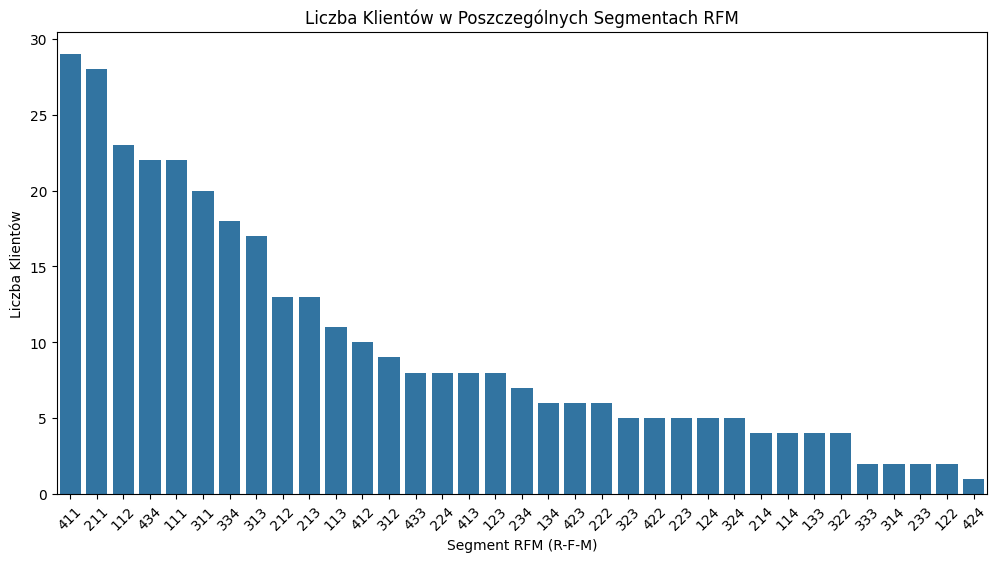

In [21]:
# Zliczanie klientów w każdym segmencie RFM
rfm_counts = df_clv['RFM_Segment'].value_counts().reset_index()
rfm_counts.columns = ['RFM_Segment', 'Customer_Count']

plt.figure(figsize=(12, 6))
sns.barplot(x='RFM_Segment', y='Customer_Count', data=rfm_counts)
plt.title('Liczba Klientów w Poszczególnych Segmentach RFM')
plt.xlabel('Segment RFM (R-F-M)')
plt.ylabel('Liczba Klientów')
plt.xticks(rotation=45)
plt.show()